##### Walmart sale force is kaggle challenge to learn Supervised learning to predict future probable outcome given the dataset. I will try to expalin all the twists and turns as simple and possible without hanging on too much on the details.



First of all, let's explore what data we have and what features and available in our data that can be useful.
Well, the Data is split in four csvs and two of them is train & test dataset while the others are features & store-info.

In [1]:
# Lets import change the cvs dataset into pandas dataframe.
# In this tutorial I will import toolkits and Libraries along the way as soon as we start using them.

import pandas as pd

features=pd.read_csv('/home/musho/Desktop/Walmart_data/features.csv')
storesdata=pd.read_csv('/home/musho/Desktop/Walmart_data/stores.csv')
train=pd.read_csv('/home/musho/Desktop/Walmart_data/train.csv')
test=pd.read_csv('/home/musho/Desktop/Walmart_data/test.csv')

In [2]:
# Let's explore the features data. This dataset have 8189 rows and if we analyze carefully the date ranges for 
# 2010-02-05 to 2013-07-26 which is 182 weeks also there are 45 stores in the data which mathmatically make 8189.

features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
# Now, if we look at training data it contains 421569 weeky_sales, which doesn't make any sense because there are
# only 8189 stores are given, but if we analyze carefully in training data number of department per store also 
# has been given, therefore, if we consider departmental level weeky sales the number 421k of sales make sense.

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# This dataset is same as training data set but only difference is it doen't contains weekly_sales report,

test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
# store data

storesdata.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
# First thing we will do is to merge all the data into single dataframe, we can get over all map of the data.
# We will use merge method due to its flexiblity.
# We will label both train test set with its respective name with a new column, this will help us to split the data
# once we had competly engineered useful features..

df_train =  pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='inner')

Train_df = pd.merge(df_train, storesdata, on=['Store'], how='inner')

df_test =  pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'], how='inner')

Test_df = pd.merge(df_test, storesdata, on=['Store'], how='inner')

Train_df['Split'] = 'Train'

Test_df['Split'] = 'Test'

dataframe = pd.concat([Train_df, Test_df], axis=0)

In [7]:
# Now let look at the dataframe and what we have
dataframe.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
115059,45,93,2013-07-26,NaN,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115060,45,94,2013-07-26,NaN,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115061,45,95,2013-07-26,NaN,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115062,45,97,2013-07-26,NaN,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115063,45,98,2013-07-26,NaN,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test


In [8]:
# Let's check what kind of numerical relationship in our Measure of Center and Measuare of speard in the numerical 
# data.

dataframe.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,536634.000000,536634.000000,421570.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,498472.000000,498472.000000,536634.000000
mean,22.208621,44.277301,15981.258123,58.771762,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,172.090481,7.791888,136678.550960
std,12.790580,30.527358,22711.183519,18.678716,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,39.542149,1.865076,61007.711799
min,1.000000,1.000000,-4988.940000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000
25%,11.000000,18.000000,2079.650000,45.250000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,132.521867,6.623000,93638.000000
50%,22.000000,37.000000,7612.030000,60.060000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,182.442420,7.795000,140167.000000
75%,33.000000,74.000000,20205.852500,73.230000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,213.748126,8.549000,202505.000000
max,45.000000,99.000000,693099.360000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


Now, let's try understand what kind of hidden relations underlaying in our dataset. I will use correation
for data visualiztion, although, it doesn’t cover all the nuance, it can be a very handy guide for visual
learners.


In [9]:
# Now both compute the correlation matrix

corr = dataframe.corr()
corr

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.023061,-0.085195,-0.000671,-0.048379,0.073123,-0.104831,-0.037433,-0.028302,-0.000270,-0.000199,-0.211333,0.208847,-0.183736
Dept,0.023061,1.000000,0.148032,0.001002,0.004151,0.003273,-0.002414,0.000646,0.000856,0.003413,0.000559,-0.007262,0.007077,-0.002004
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000671,0.001002,0.012774,1.000000,-0.163056,-0.077976,0.155907,0.306810,0.455563,0.137478,-0.025361,0.001410,-0.002996,0.000345
Temperature,-0.048379,0.004151,-0.002312,-0.163056,1.000000,0.099235,-0.107973,-0.323246,-0.076256,-0.060487,0.002354,0.169070,0.145725,-0.058202
Fuel_Price,0.073123,0.003273,-0.000120,-0.077976,0.099235,1.000000,0.065501,-0.200338,-0.059407,-0.010329,-0.023529,-0.180445,-0.030976,0.009058
MarkDown1,-0.104831,-0.002414,0.085251,0.155907,-0.107973,0.065501,1.000000,0.014288,-0.096141,0.810074,0.078151,-0.041049,0.025099,0.325043
MarkDown2,-0.037433,0.000646,0.024130,0.306810,-0.323246,-0.200338,0.014288,1.000000,-0.055310,-0.048790,-0.010670,-0.043525,-0.002587,0.128038
MarkDown3,-0.028302,0.000856,0.060385,0.455563,-0.076256,-0.059407,-0.096141,-0.055310,1.000000,-0.064432,-0.017531,-0.020147,-0.002328,0.049204
MarkDown4,-0.000270,0.003413,0.045414,0.137478,-0.060487,-0.010329,0.810074,-0.048790,-0.064432,1.000000,0.040804,-0.051643,0.021755,0.161441


If you had observed, the upper half of the triangle is exactly symetrical to the lower half of the triangle.
We will mask the upper half, therefore.

<AxesSubplot:>

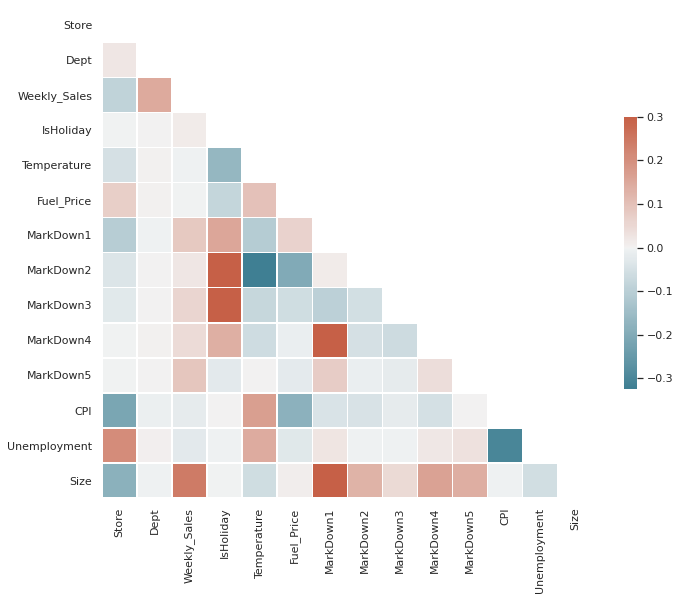

In [10]:
# Convert all the relationship to boolen by using zeros_like method True.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Now mask symetrical upper half of the correlation because it is just a repetation. 

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

corr = dataframe.corr()

sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 10))

cmap = sns.diverging_palette(220, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, square=True, center=0, vmax=0.3, linewidths=0.5, cmap=cmap, cbar_kws={'shrink':0.5})

### Let's explore the hidden relations in the heatmap.

 1- Greater size store genrate greater sales, as expected.
 
 2- It appears that higher department numbers have higher sales.
 
 3- Unemployment causes very slight inverse effect on sales. Unfortunatly, there are no other more useful insight in
 the map base on weekly sales

In [11]:
# Like every machine learning data we have to hunt down any missing values in our dataset. Otherwise,
# our model will not be able predict on out of sample data.

dataframe.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271038
MarkDown2       338949
MarkDown3       294308
MarkDown4       299491
MarkDown5       270138
CPI              38162
Unemployment     38162
Type                 0
Size                 0
Split                0
dtype: int64

It appears that there are few columns where data is missing. For weekly sales column it should be as we have to 
predict for the testing set, but for the rest of column we will do some basic feature engineering by twisting and turning the knobs and dials up and down in order to make our data feedable to our model.
Firstly, we will add few new columns by extracting the given values available in the columns where some 
values are missing.

In [12]:
# Filter all the non-nan values from the missing column and assign new series with filter values as boolen

dataframe = dataframe.assign(mk1 = dataframe['MarkDown1'].notna())
dataframe = dataframe.assign(mk2 = dataframe['MarkDown2'].notna())
dataframe = dataframe.assign(mk3 = dataframe['MarkDown3'].notna())
dataframe = dataframe.assign(mk4 = dataframe['MarkDown4'].notna())
dataframe = dataframe.assign(mk5 = dataframe.MarkDown5.notna())
dataframe = dataframe.assign(mcpi = dataframe.CPI.notna())
dataframe = dataframe.assign(mUemp = dataframe.Unemployment.notna())

In [13]:
# Now we will fill all the missing values with 0 

pd.set_option('display.max_columns', None)
dataframe.fillna(0, inplace=True)
dataframe.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split,mk1,mk2,mk3,mk4,mk5,mcpi,mUemp
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,Train,False,False,False,False,False,True,True
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,Train,False,False,False,False,False,True,True
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,Train,False,False,False,False,False,True,True
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,Train,False,False,False,False,False,True,True
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,Train,False,False,False,False,False,True,True


In [14]:
# Let's change the date format we will use datetime.strptime() method by mapping through all the dates in series,
# changing them into a string and appending then into a list, eventually into datetime format.

from datetime import datetime
from datetime import timedelta

dataframe['DateType'] = [datetime.strptime(date, '%Y-%m-%d') for date in dataframe['Date']
                         .astype(str).values.tolist()]

dataframe['Month']= [date.month for date in dataframe['DateType']]

To gain futher insight of our data we will filter down our dataset where we have higher amount sales. To know, 
the relation of higher sales per week, we have to map down our dataset where weekly_sales are higher and try to
compare it with the possible cause through given features.

In [15]:
# Firstly, lets find the weeks where we have sales above higher 300k.

dataframe.loc[dataframe['Weekly_Sales'] > 300000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split,mk1,mk2,mk3,mk4,mk5,mcpi,mUemp,DateType,Month
32594,4,72,2010-11-26,381072.11,True,48.08,2.752,0.00,0.00,0.00,0.00,0.00,126.669267,7.127,A,205863,Train,False,False,False,False,False,True,True,2010-11-26,11
36312,4,72,2011-11-25,385051.04,True,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,5.143,A,205863,Train,True,True,True,True,True,True,True,2011-11-25,11
36557,4,7,2011-12-23,318422.01,False,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,5.143,A,205863,Train,True,True,True,True,True,True,True,2011-12-23,12
51826,6,72,2010-11-26,342578.65,True,65.79,2.735,0.00,0.00,0.00,0.00,0.00,213.267296,7.007,A,202505,Train,False,False,False,False,False,True,True,2010-11-26,11
55545,6,72,2011-11-25,326866.60,True,62.78,3.236,429.03,171.88,83192.81,15.00,986.23,220.041741,6.551,A,202505,Train,True,True,True,True,True,True,True,2011-11-25,11
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,9.003,B,126512,Train,False,False,False,False,False,True,True,2010-11-26,11
90886,10,7,2010-12-24,406988.63,False,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,B,126512,Train,False,False,False,False,False,True,True,2010-12-24,12
90936,10,72,2010-12-24,404245.03,False,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,B,126512,Train,False,False,False,False,False,True,True,2010-12-24,12
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,B,126512,Train,True,True,True,True,True,True,True,2011-11-25,11
94634,10,7,2011-12-23,341308.00,False,48.36,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,7.874,B,126512,Train,True,True,True,True,True,True,True,2011-12-23,12


In [16]:
# There are 34 weeks where we have more than $300k sales. Interestly, it appears at the and of years November and 
# December are common. Well, we can easily infered that this sales skyrocket has been caused
# of back-friday and Chrismis. Remember, holidays usually have higher sales rate but these are the week-days.
# Let's add column for each PreChristmasDay and BlackFriday

dataframe['BlackFriday'] = np.where((dataframe.DateType == datetime(2010, 11, 26)) |
                                     (dataframe.DateType == datetime(2010, 11, 25)) |
                                     (dataframe.DateType == datetime(2011, 11, 25)) |
                                     (dataframe.DateType == datetime(2010, 11, 24)),
                                     'Yes', 'No' )

dataframe['PreChristmasDay'] = np.where((dataframe.DateType == datetime(2010, 12, 24)) |
                                     (dataframe.DateType == datetime(2011, 12, 23)),
                                     'Yes', 'No' )

In [17]:
# Now lets find the MedianSales add into the series, we will need it in next step too find sales in Prior Week.
# The Median sale will be based on the number of department per month for each type of stores. This 

medians = pd.DataFrame({'MedianSales': dataframe.loc[dataframe['Split'] == 'Train']
                      .groupby(by=['Type', 'Dept', 'Store', 'Month',
                      'IsHoliday'])['Weekly_Sales'].median()
                       }).reset_index()

In [18]:
# Merge the Median Sales with dataframe and fill any NaN value with median of train. 

dataframe = dataframe.merge(medians, how='outer', on=['Type', 'Dept', 'Store', 'Month', 'IsHoliday'])
dataframe['MedianSales'].fillna(dataframe['MedianSales'].loc[dataframe.Split == 'Train'].median(), inplace=True)


# We now add a week prior DateTime into the dataframe, this will allow to trace the sales each week in a month.

dataframe['PriorWeekDate'] = dataframe['DateType']-timedelta(7)

Sorted_df = dataframe.sort_values(['Store', 'Dept', 'DateType'], ascending=[1,1,1]).reset_index(drop=True)

In [19]:
# Now add sales for the week prior to our given dates, as there is no data aviable we will add NaN to the column.

Sorted_df['PriorWeekSale'] = np.nan
Sorted_df['PriorWeek'] = np.nan

# intialize last row for first iteration of dataframe. Doesn't really matter what it is
last = dataframe.loc[0]  
print(last)

# intialize last row for first iteration of sorted_df. Doesn't really matter what it is
row_len = Sorted_df.shape[0]
print(row_len)
for index, row in Sorted_df.iterrows():
    
    lag_date = row['PriorWeekDate']
    
    if ((last['DateType'] == lag_date) & (last['Weekly_Sales'] > 0)):
        Sorted_df.at[index, 'PriorWeekSale'] = last['Weekly_Sales']
        Sorted_df.at[index, "PriorWeek"] = 1
    else:
        Sorted_df.at[index, 'PriorWeekSale'] =  row['MedianSales']
        Sorted_df.at[index, "PriorWeek"] = 0
        
    last = row      # Remember value from last row and replace the dataframe.loc[0] with the a new value of
                    # last row & select next date for next itteration
    
    if(index%int(row_len/10)==0):
        print(str(int(index*100/row_len))+ '% loaded')

Store                                1
Dept                                 1
Date                        2010-02-05
Weekly_Sales                   24924.5
IsHoliday                        False
Temperature                      42.31
Fuel_Price                       2.572
MarkDown1                            0
MarkDown2                            0
MarkDown3                            0
MarkDown4                            0
MarkDown5                            0
CPI                            211.096
Unemployment                     8.106
Type                                 A
Size                            151315
Split                            Train
mk1                              False
mk2                              False
mk3                              False
mk4                              False
mk5                              False
mcpi                              True
mUemp                             True
DateType           2010-02-05 00:00:00
Month                    

In [20]:
Sorted_df[['Dept', 'Store', 'DateType', 'PriorWeekSale', 'Weekly_Sales', 'MedianSales']].head()

,Dept,Store,DateType,PriorWeekSale,Weekly_Sales,MedianSales
0,1,1,2010-02-05,23510.49,24924.50,23510.49
1,1,1,2010-02-12,24924.50,46039.49,37887.17
2,1,1,2010-02-19,46039.49,41595.55,23510.49
3,1,1,2010-02-26,41595.55,19403.54,23510.49
4,1,1,2010-03-05,19403.54,21827.90,21280.40


In [21]:
# Merge sorted_df with dataframe

dataframe = dataframe.merge(Sorted_df[['Dept', 'Store', 'DateType', 'PriorWeek', 'PriorWeekSale']],
                            how='inner', on=['Dept', 'Store', 'DateType'])

So far so good, the summary of what we have done are, we hunt-down for the null values, added columns by 
filtering values, and add 0 into the dataframe.Then we change Date into Datetime
format by adding two more rows for DateType and for the Month, this allowed us to work with date related 
problems.Then we added two more series for Blackfriday and PreChrismis as there were extremly high
weeky sale record found, and added the median price into the dataframe base on per month.

In [22]:
# As we have some unordered categorical data into our dataframe, therefore, now we add some dummy encoder aka
# indicator-variable into data for all the categorical columns which contains more sales relationship compared
# to other, before that,to indentify those columns and we will map the column title to each value in the series
# So summy encoder can easily be identify.

dataframe['Store'] = 'Store_'+dataframe['Store'].map(str)
dataframe['Type'] = 'Type_'+dataframe['Type'].map(str)
dataframe['Dept'] = 'Dept_'+dataframe['Dept'].map(str)
dataframe['IsHoliday'] = 'IsHoliday_'+dataframe['IsHoliday'].map(str)
dataframe['BlackFriday'] = "BlackFriday_"+dataframe['BlackFriday'].map(str)
dataframe['PreChristmasDay'] = "PreChristmasDay_"+dataframe['PreChristmasDay'].map(str)

IsHolidayDummy = pd.get_dummies(dataframe.IsHoliday)
PreChristmasDummy = pd.get_dummies(dataframe.PreChristmasDay)
BlackFridayDummy = pd.get_dummies(dataframe.BlackFriday)

dataframe = pd.concat([dataframe, IsHolidayDummy, PreChristmasDummy, BlackFridayDummy], axis=1)

In [23]:
# Let's find Sales difference from median to PreWeekSales. 

dataframe['SalesDifference'] = dataframe['MedianSales'] - dataframe['PriorWeekSale']

In [24]:
dataframe[['Dept', 'Store', 'DateType', 'PriorWeekSale', 'Weekly_Sales', 'MedianSales']].head()

,Dept,Store,DateType,PriorWeekSale,Weekly_Sales,MedianSales
0,Dept_1,Store_1,2010-02-05,23510.49,24924.50,23510.49
1,Dept_1,Store_1,2010-02-19,46039.49,41595.55,23510.49
2,Dept_1,Store_1,2010-02-26,41595.55,19403.54,23510.49
3,Dept_1,Store_1,2011-02-04,18461.18,21665.76,23510.49
4,Dept_1,Store_1,2011-02-18,37887.17,46845.87,23510.49


In [25]:
dataframe['Difference'] = dataframe['MedianSales'] - dataframe['Weekly_Sales']

dataframe['Key'] = dataframe['Type'].map(str)+dataframe['Dept'].map(str)+dataframe['Store'].map(str)+dataframe['Date'].map(str)+dataframe['IsHoliday'].map(str)
dataframe

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split,mk1,mk2,mk3,mk4,mk5,mcpi,mUemp,DateType,Month,BlackFriday,PreChristmasDay,MedianSales,PriorWeekDate,PriorWeek,PriorWeekSale,IsHoliday_False,IsHoliday_True,PreChristmasDay_No,PreChristmasDay_Yes,BlackFriday_No,BlackFriday_Yes,SalesDifference,Difference,Key
0,Store_1,Dept_1,2010-02-05,24924.50,IsHoliday_False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,Type_A,151315,Train,False,False,False,False,False,True,True,2010-02-05,2,BlackFriday_No,PreChristmasDay_No,23510.49,2010-01-29,0.0,23510.49,1,0,1,0,1,0,0.00,-1414.01,Type_ADept_1Store_12010-02-05IsHoliday_False
1,Store_1,Dept_1,2010-02-19,41595.55,IsHoliday_False,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,Type_A,151315,Train,False,False,False,False,False,True,True,2010-02-19,2,BlackFriday_No,PreChristmasDay_No,23510.49,2010-02-12,1.0,46039.49,1,0,1,0,1,0,-22529.00,-18085.06,Type_ADept_1Store_12010-02-19IsHoliday_False
2,Store_1,Dept_1,2010-02-26,19403.54,IsHoliday_False,46.63,2.561,0.00,0.0,0.00,0.00,0.00,211.319643,8.106,Type_A,151315,Train,False,False,False,False,False,True,True,2010-02-26,2,BlackFriday_No,PreChristmasDay_No,23510.49,2010-02-19,1.0,41595.55,1,0,1,0,1,0,-18085.06,4106.95,Type_ADept_1Store_12010-02-26IsHoliday_False
3,Store_1,Dept_1,2011-02-04,21665.76,IsHoliday_False,42.27,2.989,0.00,0.0,0.00,0.00,0.00,212.566881,7.742,Type_A,151315,Train,False,False,False,False,False,True,True,2011-02-04,2,BlackFriday_No,PreChristmasDay_No,23510.49,2011-01-28,1.0,18461.18,1,0,1,0,1,0,5049.31,1844.73,Type_ADept_1Store_12011-02-04IsHoliday_False
4,Store_1,Dept_1,2011-02-18,46845.87,IsHoliday_False,57.36,3.045,0.00,0.0,0.00,0.00,0.00,213.247885,7.742,Type_A,151315,Train,False,False,False,False,False,True,True,2011-02-18,2,BlackFriday_No,PreChristmasDay_No,23510.49,2011-02-11,1.0,37887.17,1,0,1,0,1,0,-14376.68,-23335.38,Type_ADept_1Store_12011-02-18IsHoliday_False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,Store_44,Dept_44,2013-06-14,0.00,IsHoliday_False,76.41,3.771,351.38,0.0,4.89,6.35,867.28,0.000000,0.000,Type_C,39910,Test,True,False,True,True,True,False,False,2013-06-14,6,BlackFriday_No,PreChristmasDay_No,7563.04,2013-06-07,0.0,7563.04,1,0,1,0,1,0,0.00,7563.04,Type_CDept_44Store_442013-06-14IsHoliday_False
536630,Store_44,Dept_22,2013-07-12,0.00,IsHoliday_False,78.93,3.666,182.25,0.0,6.63,0.00,1842.48,0.000000,0.000,Type_C,39910,Test,True,False,True,False,True,False,False,2013-07-12,7,BlackFriday_No,PreChristmasDay_No,7563.04,2013-07-05,0.0,7563.04,1,0,1,0,1,0,0.00,7563.04,Type_CDept_22Store_442013-07-12IsHoliday_False
536631,Store_44,Dept_22,2013-07-19,0.00,IsHoliday_False,80.81,3.665,118.82,0.0,3.15,0.00,514.08,0.000000,0.000,Type_C,39910,Test,True,False,True,False,True,False,False,2013-07-19,7,BlackFriday_No,PreChristmasDay_No,7563.04,2013-07-12,0.0,7563.04,1,0,1,0,1,0,0.00,7563.04,Type_CDept_22Store_442013-07-19IsHoliday_False
536632,Store_44,Dept_22,2013-07-26,0.00,IsHoliday_False,83.62,3.669,134.31,0.0,1.00,0.00,199.75,0.000000,0.000,Type_C,39910,Test,True,False,True,False,True,False,False,2013-07-26,7,BlackFriday_No,PreChristmasDay_No,7563.04,2013-07-19,0.0,7563.04,1,0,1,0,1,0,0.00,7563.04,Type_CDept_22Store_442013-07-26IsHoliday_False


<AxesSubplot:>

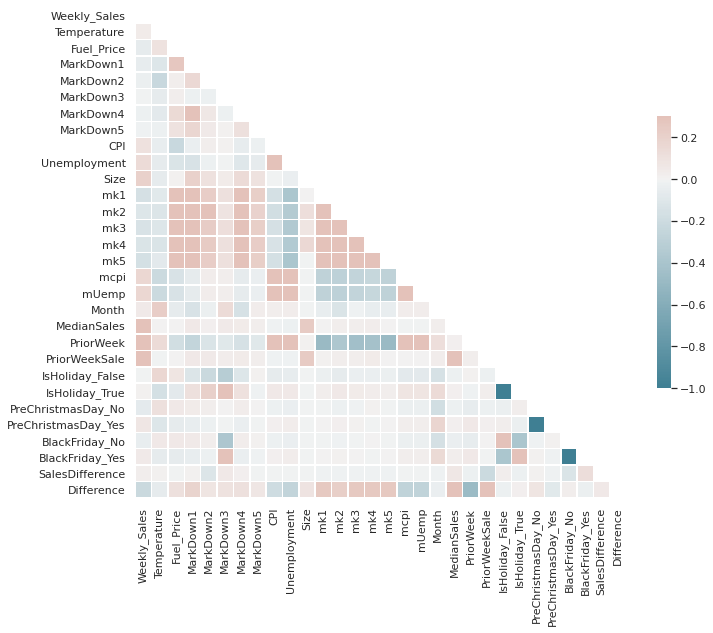

In [26]:
corr = dataframe.corr()

plt.subplots(figsize=(11, 10))

sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, center=0, linewidths=0.5,vmax=0.3,cbar_kws={'shrink': 0.5} )

We are done with our data feature engineering and series manupilation.
Now, it's time to reep the fruits of our data manipulation labors and feed it to AI model.

In [27]:
# we will choose only essential features to train the model as selector

choosen = [
    'CPI','Fuel_Price','MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'Size','Temperature',
    'Unemployment', 'mk1', 'mk2', 'mk3', 'mk4', 'mk5', 'mcpi','mUemp', 'IsHoliday_False', 'IsHoliday_True',
    'PreChristmasDay_No', 'PreChristmasDay_Yes','BlackFriday_No', 'BlackFriday_Yes',    
    'PriorWeekSale','SalesDifference','PriorWeek'
]

display(dataframe[choosen].describe())
display(dataframe[choosen].head())

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,IsHoliday_False,IsHoliday_True,PreChristmasDay_No,PreChristmasDay_Yes,BlackFriday_No,BlackFriday_Yes,PriorWeekSale,SalesDifference,PriorWeek
count,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000
mean,159.852499,3.408310,3681.287709,1292.745138,838.971725,1489.918846,2147.337557,136678.550960,58.771762,7.237779,0.928091,0.071909,0.988851,0.011149,0.988896,0.011104,15969.738804,-195.362035,0.773412
std,58.383773,0.430861,7593.883000,5714.136207,7860.456173,4865.593575,9789.902903,61007.711799,18.678716,2.691035,0.258338,0.258338,0.104999,0.104999,0.104791,0.104791,22689.394444,6003.550792,0.418624
min,0.000000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,34875.000000,-7.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1750.000000,-540263.085000,0.000000
25%,131.126667,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.000000,45.250000,6.334000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2102.872500,-302.140000,1.000000
50%,140.439786,3.523000,0.000000,0.000000,0.000000,0.000000,0.000000,140167.000000,60.060000,7.567000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7608.320000,0.000000,1.000000
75%,212.303441,3.744000,5046.740000,118.730000,29.140000,906.450000,2852.190000,202505.000000,73.230000,8.512000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20182.661250,279.820000,1.000000
max,228.976456,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,219622.000000,101.950000,14.313000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,693099.360000,579251.325000,1.000000


,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,mk1,mk2,mk3,mk4,mk5,mcpi,mUemp,IsHoliday_False,IsHoliday_True,PreChristmasDay_No,PreChristmasDay_Yes,BlackFriday_No,BlackFriday_Yes,PriorWeekSale,SalesDifference,PriorWeek
0,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,False,False,False,False,False,True,True,1,0,1,0,1,0,23510.49,0.00,0.0
1,211.289143,2.514,0.0,0.0,0.0,0.0,0.0,151315,39.93,8.106,False,False,False,False,False,True,True,1,0,1,0,1,0,46039.49,-22529.00,1.0
2,211.319643,2.561,0.0,0.0,0.0,0.0,0.0,151315,46.63,8.106,False,False,False,False,False,True,True,1,0,1,0,1,0,41595.55,-18085.06,1.0
3,212.566881,2.989,0.0,0.0,0.0,0.0,0.0,151315,42.27,7.742,False,False,False,False,False,True,True,1,0,1,0,1,0,18461.18,5049.31,1.0
4,213.247885,3.045,0.0,0.0,0.0,0.0,0.0,151315,57.36,7.742,False,False,False,False,False,True,True,1,0,1,0,1,0,37887.17,-14376.68,1.0


In [40]:
# Lets split the Traing and Testing sets

train = dataframe.loc[dataframe['Split'] == 'Train']
test = dataframe.loc[dataframe['Split'] == 'Test']

display(train.shape)
display(test.shape)

(421570, 41)

(115064, 41)

In [29]:
# Further, we will split our training set into evaluation set and train-set to keep performance in the view


from sklearn.model_selection import train_test_split


np.random.seed(101)     # Keeping the data in a seed 

X_train, X_eval, y_train, y_eval = train_test_split(train[choosen], train['Difference'], test_size=0.2,
                                                    random_state=101)

# Save computing power by changing the bit into 32.

#X_train = X_train.astype('float32')
#X_eval = X_eval.astype('float32')


In [30]:
print(X_eval.shape)
print(y_eval.shape)

# Good to go, for each training set there is a label.

(84314, 26)
(84314,)


In [31]:
# Our data is all set now, lets build a deep-neural network with two hidde layers the Input Tensor will be a
# a simple train test Input.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


neural = False


if neural:
    # Sequential model
    model = keras.Sequential([
        keras.Input(shape=(X_train.shape[0], X_train.shape[1])),
        layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
        loss = keras.losses.MeanAbsoluteError(),
        metrics= ['accuracy']
    )
    
    trained_model = model.fit(X_train, y_train, epochs=10, batch_size=2048, verbose=0)
    model.evaluate(x=X_eval, y=y_eval)
    
    plt.plot(trained_model.history['loss'], label='Adam Regularized')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    y_pred_neural = model.predict(X_eval)

   10 epochs 18% accuracy,
   
   100 epochs 38% accuracy
   
   500 epochs 44%  accuracy 
   

In [32]:
# Lets build another model using Random-Forest-Regressor alog.
# Why Random Forest?
# As Random forest is one of the best model to predict missing values given the dataset, efficent accuracy with
# low training time, also prevent from overfitting.

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(
                    n_jobs=1,
                    random_state=0,
                    n_estimators=20,
                    criterion='mse',
                    max_depth=None,
                    min_samples_split=1.0,
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0,
                    max_features='auto',
                    max_leaf_nodes=None,
                    min_impurity_decrease=0.0,
                    min_impurity_split=None,
                    bootstrap=True,
                    oob_score=False,
                    verbose=2,
                    warm_start=False
                    )

In [33]:
RFR.fit(X_train, y_train)      # Return a contiguous flattened array.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished


RandomForestRegressor(min_samples_split=1.0, min_weight_fraction_leaf=0,
                      n_estimators=20, n_jobs=1, random_state=0, verbose=2)

In [34]:
pred_RFR = RFR.predict(X_eval)
print(pred_RFR)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[-252.26933738 -252.26933738 -252.26933738 ... -252.26933738 -252.26933738
 -252.26933738]


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [35]:
def binary(movement):
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    direction = np.empty(movement.shape[0])
    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(movement.shape[0]):
        if movement[i] > 0:
            direction[i] = 1
        else:
            direction[i]= 0
    return direction

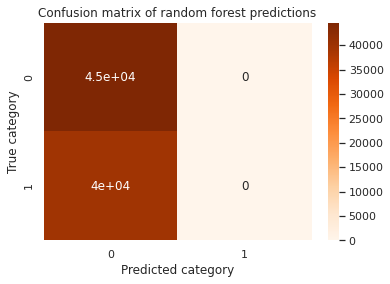

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_eval = y_eval.to_frame()

direction_true1 = binary(y_eval.values)

direction_predict = binary(pred_RFR)

cnf_matrix = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)

ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Oranges, annot=True)

plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

In [37]:
y_eval['Predicted'] = pred_RFR

df_out = pd.merge(train, y_eval[['Predicted']], how = 'left', left_index=True, right_index=True,
                  suffixes=['_True','_Pred'])

df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split,mk1,mk2,mk3,mk4,mk5,mcpi,mUemp,DateType,Month,BlackFriday,PreChristmasDay,MedianSales,PriorWeekDate,PriorWeek,PriorWeekSale,IsHoliday_False,IsHoliday_True,PreChristmasDay_No,PreChristmasDay_Yes,BlackFriday_No,BlackFriday_Yes,SalesDifference,Difference,Key,Predicted
2,Store_1,Dept_1,2010-02-26,19403.54,IsHoliday_False,46.63,2.561,0.00,0.00,0.0,0.00,0.00,211.319643,8.106,Type_A,151315,Train,False,False,False,False,False,True,True,2010-02-26,2,BlackFriday_No,PreChristmasDay_No,23510.49,2010-02-19,1.0,41595.55,1,0,1,0,1,0,-18085.06,4106.95,Type_ADept_1Store_12010-02-26IsHoliday_False,-252.269337
19,Store_1,Dept_2,2012-02-17,46085.47,IsHoliday_False,45.32,3.510,9873.33,11062.27,9.8,8409.31,3402.66,220.425759,7.348,Type_A,151315,Train,True,True,True,True,True,True,True,2012-02-17,2,BlackFriday_No,PreChristmasDay_No,47080.12,2012-02-10,1.0,50581.06,1,0,1,0,1,0,-3500.94,994.65,Type_ADept_2Store_12012-02-17IsHoliday_False,-252.269337
28,Store_1,Dept_3,2011-02-18,11724.98,IsHoliday_False,57.36,3.045,0.00,0.00,0.0,0.00,0.00,213.247885,7.742,Type_A,151315,Train,False,False,False,False,False,True,True,2011-02-18,2,BlackFriday_No,PreChristmasDay_No,11135.17,2011-02-11,1.0,11428.25,1,0,1,0,1,0,-293.08,-589.81,Type_ADept_3Store_12011-02-18IsHoliday_False,-252.269337
29,Store_1,Dept_3,2011-02-25,10473.78,IsHoliday_False,62.90,3.065,0.00,0.00,0.0,0.00,0.00,213.535609,7.742,Type_A,151315,Train,False,False,False,False,False,True,True,2011-02-25,2,BlackFriday_No,PreChristmasDay_No,11135.17,2011-02-18,1.0,11724.98,1,0,1,0,1,0,-589.81,661.39,Type_ADept_3Store_12011-02-25IsHoliday_False,-252.269337
31,Store_1,Dept_3,2012-02-17,10237.78,IsHoliday_False,45.32,3.510,9873.33,11062.27,9.8,8409.31,3402.66,220.425759,7.348,Type_A,151315,Train,True,True,True,True,True,True,True,2012-02-17,2,BlackFriday_No,PreChristmasDay_No,11135.17,2012-02-10,1.0,12388.85,1,0,1,0,1,0,-1253.68,897.39,Type_ADept_3Store_12012-02-17IsHoliday_False,-252.269337


In [38]:
def plot_prediction(predicted,true,desciption):
    fig, ax = plt.subplots()
    ax.scatter(true, predicted, edgecolors=(0, 0, 0))
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted by '+desciption)
    ax.plot([-30,30], [0,0], 'k-')   
    ax.plot([0,0], [-30,30], 'k-')
    plt.show()

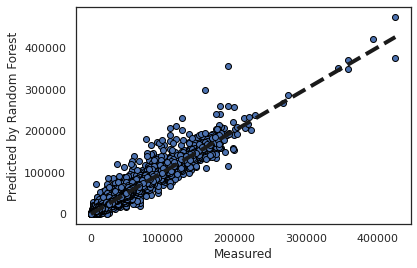

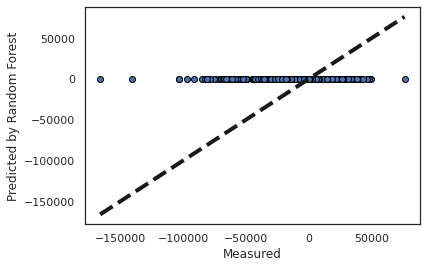

In [39]:
df_out['prediction'] = df_out['MedianSales']-df_out['Predicted']
plot_prediction(df_out['Weekly_Sales'],df_out['prediction'],"Random Forest")
plot_prediction(pred_RFR,y_eval['Difference'].values,"Random Forest")